## Data Exploration of the Olist Customer Satisfaction dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import viz_utils
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('data/olist_customers_dataset.csv')

In [5]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [6]:
num_df = df.select_dtypes(include=[np.number])

In [7]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [8]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,1.093747,2.946233,172.387379,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409
std,0.729849,2.781087,265.873969,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.870000,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,108.050000,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,189.480000,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,29.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [9]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

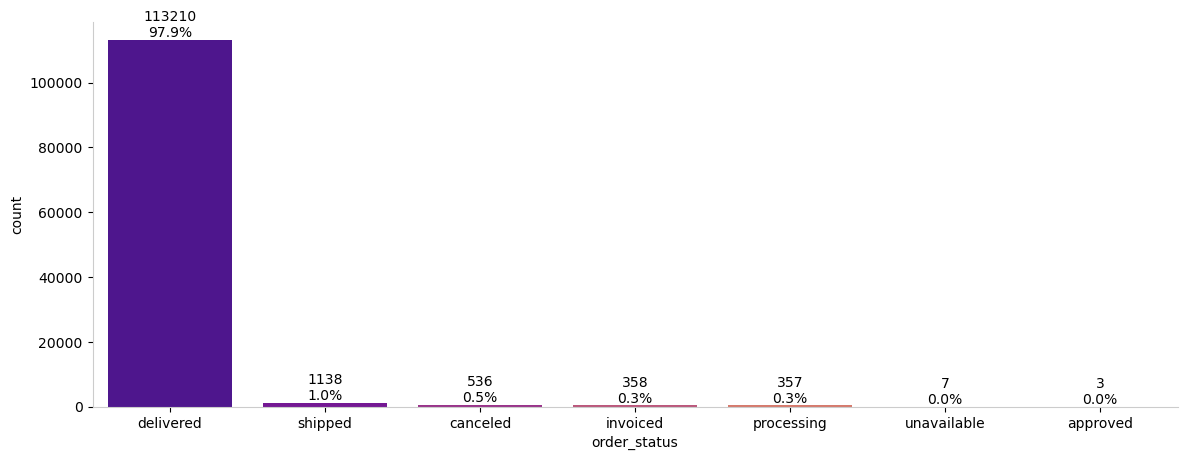

In [15]:
fig, ax = plt.subplots(figsize=(14,5))
viz_utils.single_countplot(df,x='order_status',ax=ax)

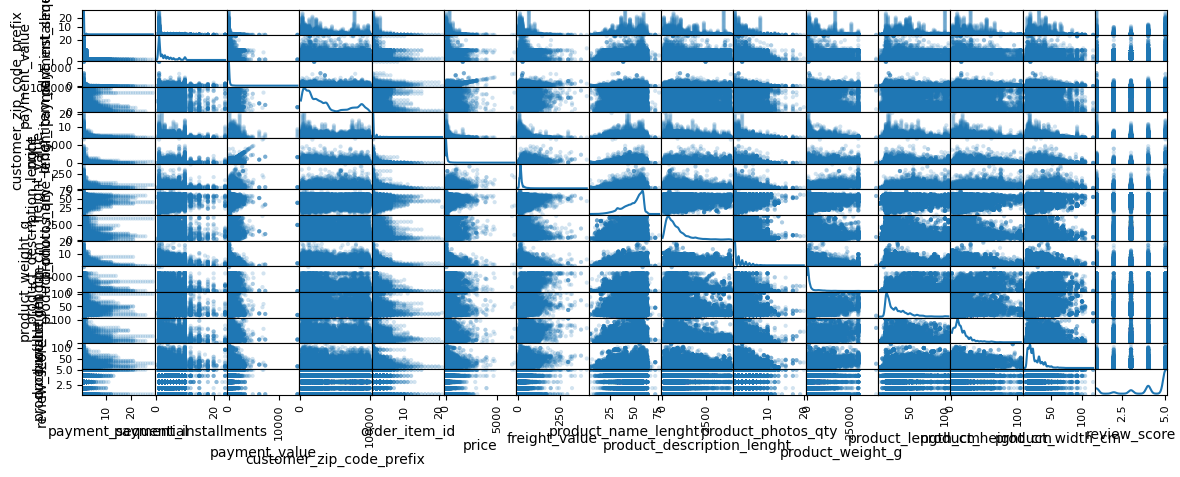

In [21]:
scatter_matrix(num_df, figsize=(14,5),diagonal='kde', alpha=0.2)
plt.show()

<Axes: xlabel='review_score', ylabel='Count'>

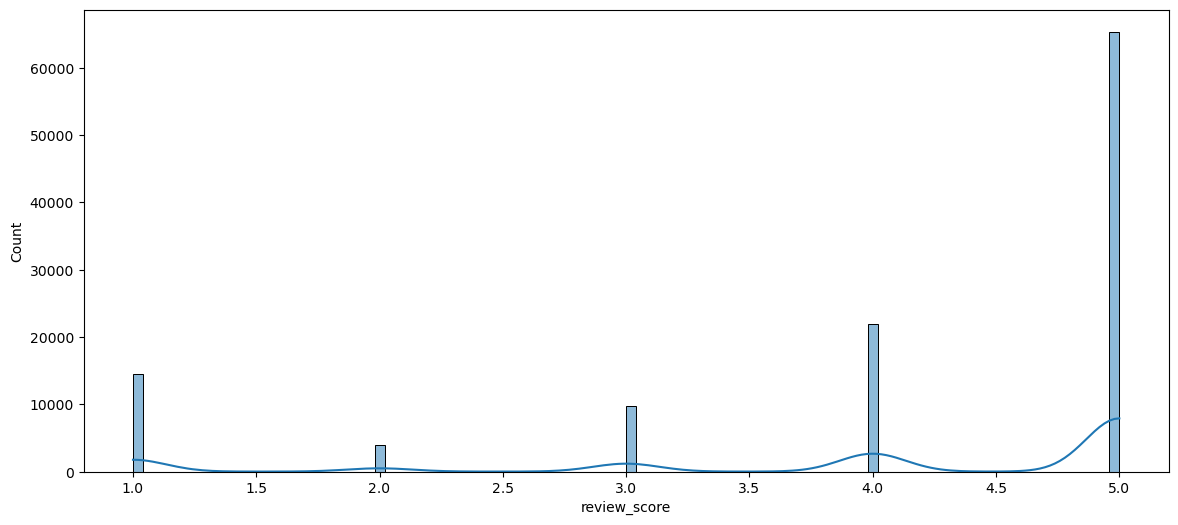

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
sns.histplot(data=num_df,x="review_score", kde=True, ax=ax)

In [24]:
num_df["review_cat"] = pd.cut(num_df["review_score"], bins=[1.0, 2.0, 3.0, 4.0, 5.0, np.inf], labels=[1,2,3,4,5])

<Axes: >

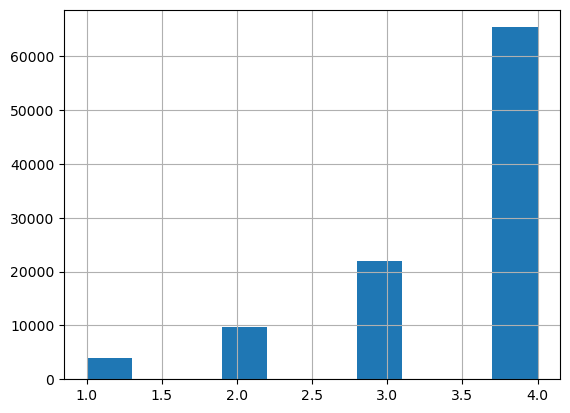

In [25]:
num_df["review_cat"].hist()

In [27]:
num_df.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score', 'review_cat'],
      dtype='object')

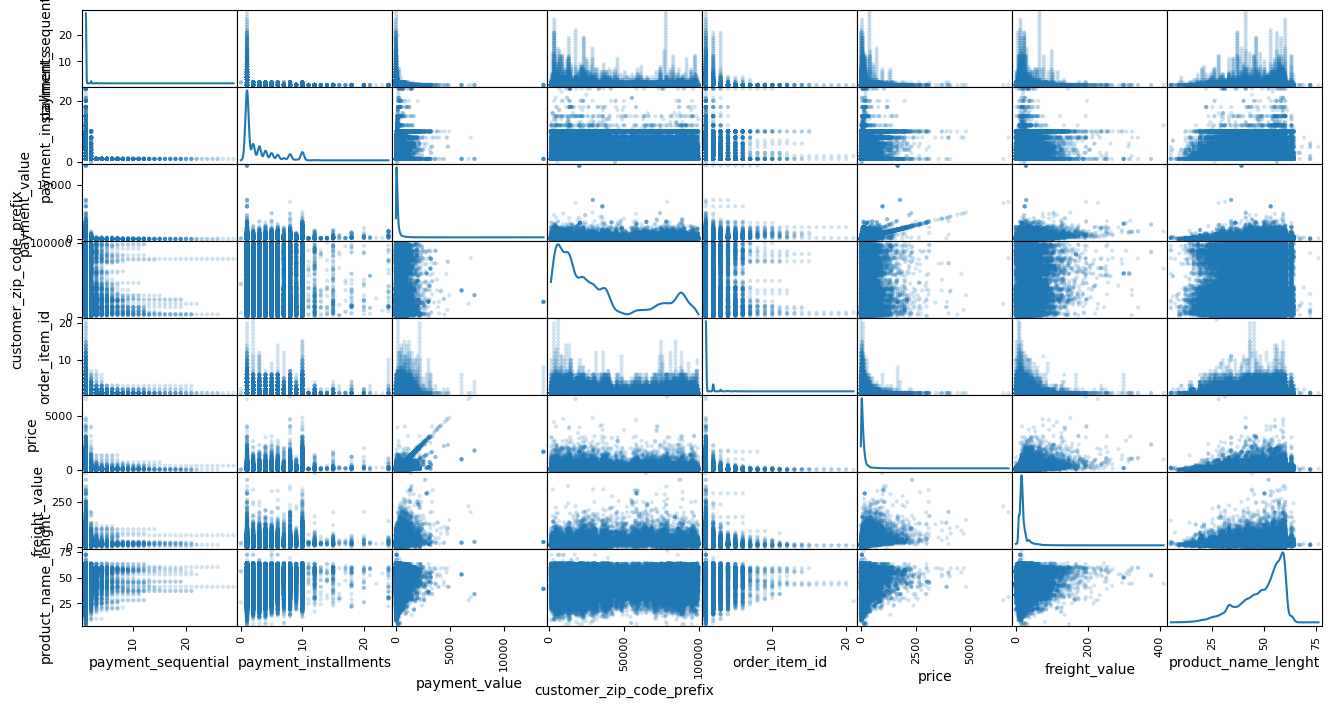

In [32]:
first  = num_df[['payment_sequential', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght']]

scatter_matrix(first,figsize=(16,8),diagonal='kde',alpha=0.2)
plt.show()

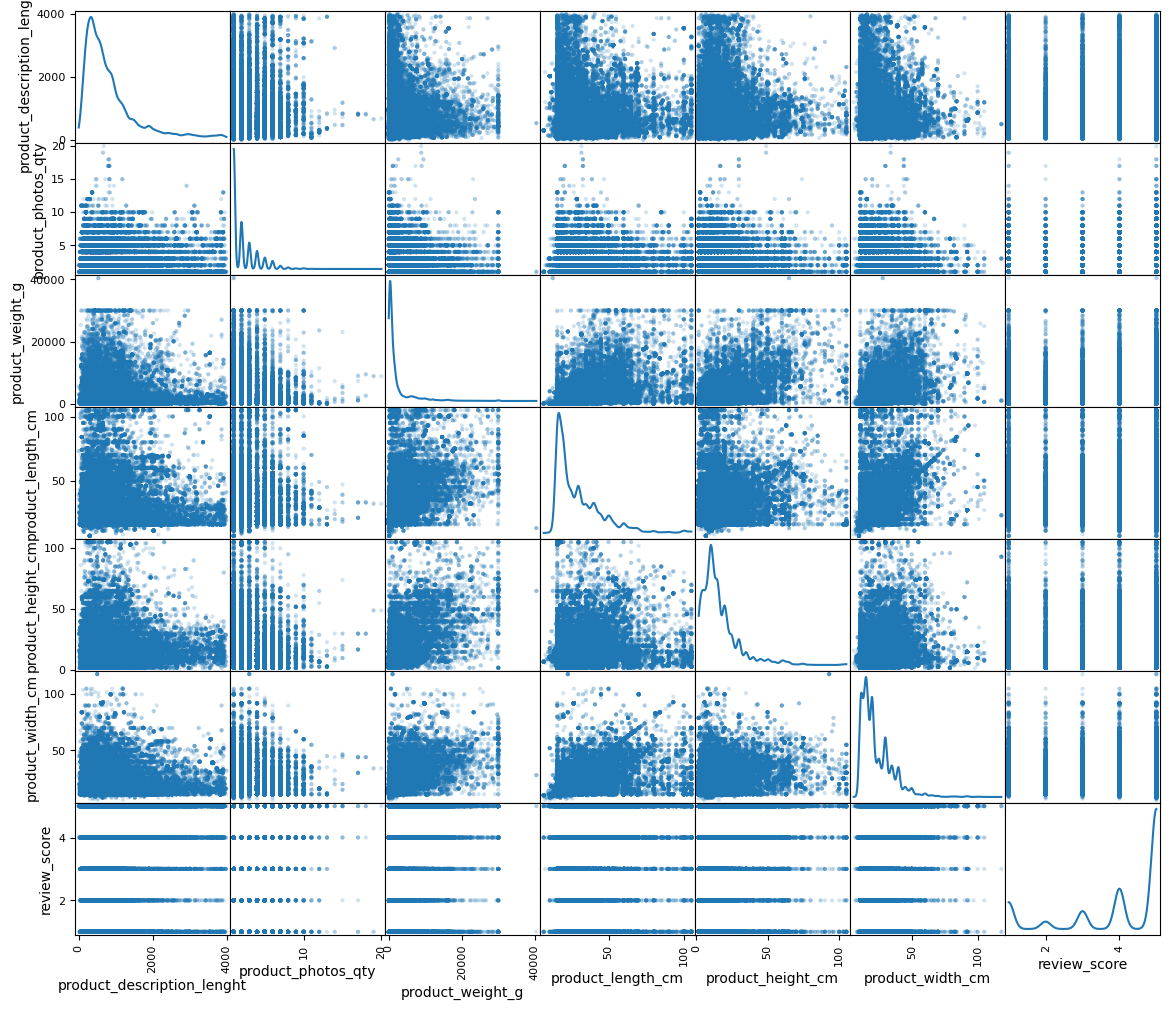

In [31]:
sec = num_df[['product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score']]

scatter_matrix(sec, figsize=(14,12), diagonal='kde', alpha=0.2)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

In [ ]:
## Encode the order status: Its an important variable for the review score

In [37]:
order_cat = df[['order_status']]
cat_encoder = OneHotEncoder()
order_status_encoder = cat_encoder.fit_transform(order_cat)


In [57]:
df.groupby(['order_status']).size()

order_status
approved            3
canceled          536
delivered      113210
invoiced          358
processing        357
shipped          1138
unavailable         7
dtype: int64

In [40]:
cat_encoder.categories_

[array(['approved', 'canceled', 'delivered', 'invoiced', 'processing',
        'shipped', 'unavailable'], dtype=object)]

In [8]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [12]:
df_encoded = pd.get_dummies(df, columns=['order_status'], prefix='status')

In [14]:
df_numeric = df_encoded.select_dtypes(include=np.number)

In [16]:
df_numeric.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score',
       'status_approved', 'status_canceled', 'status_delivered',
       'status_invoiced', 'status_processing', 'status_shipped',
       'status_unavailable'],
      dtype='object')

In [17]:
corr_matrix = df_numeric.corr()
corr_matrix["review_score"]

payment_sequential           -0.004336
payment_installments         -0.043014
payment_value                -0.082848
customer_zip_code_prefix     -0.023981
order_item_id                -0.128691
price                        -0.005057
freight_value                -0.038282
product_name_lenght          -0.006232
product_description_lenght    0.010255
product_photos_qty            0.022296
product_weight_g             -0.030170
product_length_cm            -0.022240
product_height_cm            -0.027850
product_width_cm             -0.012565
review_score                  1.000000
status_approved              -0.007480
status_canceled              -0.120058
status_delivered              0.239313
status_invoiced              -0.094979
status_processing            -0.108046
status_shipped               -0.147282
status_unavailable           -0.013832
Name: review_score, dtype: float64

In [30]:
df_numeric["product_weight_g"].fillna(df_numeric["product_weight_g"].median(), inplace=True)
df_numeric["product_length_cm"].fillna(df_numeric["product_length_cm"].median(), inplace=True)
df_numeric["product_height_cm"].fillna(df_numeric["product_height_cm"].median(), inplace=True)
df_numeric["product_width_cm"].fillna(df_numeric["product_width_cm"].median(),inplace=True)
df_numeric.isna().sum()

payment_sequential            0
payment_installments          0
payment_value                 0
customer_zip_code_prefix      0
order_item_id                 0
price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
review_score                  0
status_approved               0
status_canceled               0
status_delivered              0
status_invoiced               0
status_processing             0
status_shipped                0
status_unavailable            0
dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [70]:
X_dataset = df_numeric.drop("review_score",axis=1)
Y_dataset = df_numeric[["review_score"]]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=0.3,random_state=42)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Transform the dataset by standardizing

In [74]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators = 100)

In [75]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
y_train_preds = lin_reg.predict(X_train)
lin_mse_a = mean_squared_error(y_train_preds, y_train)
lin_rmse = np.sqrt(lin_mse_a)
print("MSE Of the training: {}".format(lin_rmse))

MSE Of the training: 1.331743048174963


In [ ]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [77]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
preds_reg = rf_reg.predict(X_train)
rf_mse_a = mean_squared_error(preds_reg, y_train)
rf_rmse = np.sqrt(rf_mse_a)
print("RMSE of training Random Forest Regressor is: {}".format(rf_rmse))

RMSE of training Random Forest Regressor is: 0.4844534757363129


In [86]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean",np.mean(scores))
    print("Standard Deviation",np.std(scores))

In [87]:
scores_reg = cross_val_score(rf_reg, X_train,y_train,scoring="neg_mean_squared_error",cv=10)
rf_rmse = np.sqrt(-scores_reg)

In [88]:
display_scores(rf_rmse)

Scores [1.29206703 1.28265494 1.29479463 1.28933244 1.28744033 1.28631069
 1.28362346 1.28220068 1.29451956 1.27690389]
Mean 1.2869847627738589
Standard Deviation 0.00551658571843421


In [91]:
def get_acc(accuracy: float, config=0.9):
    return (accuracy >= config)

get_acc(0.96)

True

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]